In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk

PATH_TRAIN = "diagnostico2.csv"

df_train = pd.read_csv(PATH_TRAIN,encoding = 'utf8',header = 0)

In [73]:
print(df_train.shape)

(733, 14)


### Retira instâncias com comentários empty

In [74]:
dados = df_train[['Disciplina/Turma','Dificuldades ou problemas da disciplina/turma','Potencialidades ou práticas exitosas da disciplina/turma.','Sugestões ou comentários adicionais.']]

#dados = dados.dropna()

In [75]:
#print(dados)

In [76]:
alunosapc = dados['Disciplina/Turma'] == 'APC'

alunosed = dados['Disciplina/Turma'] == 'ED'

somenteapc = dados[alunosapc]

somenteed = dados[alunosed]

#print(somenteed)

#dificuldades_apc = somenteapc[['Dificuldades ou problemas da disciplina/turma','Potencialidades ou práticas exitosas da disciplina/turma.','Sugestões ou comentários adicionais.']]
comments_apc = somenteapc[['Dificuldades ou problemas da disciplina/turma']]
comments_ed = somenteed[['Dificuldades ou problemas da disciplina/turma']]

#comments = dados[['Dificuldades ou problemas da disciplina/turma']]

#print(comments_apc)

#print(dificuldades_apc.shape)

#print(comments_apc)

comments_apc = comments_apc.dropna()
comments_ed = comments_ed.dropna()

In [77]:
print(comments_apc)

        Dificuldades ou problemas da disciplina/turma
3   Marquei para finalizar e está me perguntando s...
6                    Prazo de entregas das atividades
9   Não tenho conseguido me adaptar muito com a di...
15   não há. os alunos são participativos e educados.
18  Muitas vezes eu não entendo a explicação do livro
21                                                   
25  Falta de tempo para a prática de forma adequad...
36  O Moodle é um pouco complicado as vezes. Seria...
37                  Entender a documentação de Python
40   A falta de aulas sincronas afeta meu aprendizado
45  Às vezes os questionários não são muito claros...
48  Por ser iniciante, as vezes não sei exatamente...
50  Conteúdo abrange além do explicado na semana e...
52                                   Nada a comentar.
54                                               \r\n
55                                             Nenhum
60  demorei um pouco para me adaptar ao moodle e p...
61  o maior problema desta d

In [78]:
print(comments_ed)

         Dificuldades ou problemas da disciplina/turma
212                      Não houve problemas até agora
217                                             Nenhum
220  Dificuldade com a mudança da linguagem para Py...
222                                Não tive problemas.
223                                    Não tive ainda.
225  Dificuldade na assimilação do conteúdo no que ...
226                                           Nenhuma 
236  Sinto falta das aulas síncronas, com foco em t...
238  so teve uma aula que a internet estava ruim. d...
241                   Acompanhar as aulas e Atividades
244  Tenho problemas para os estudos devido a vida ...
246                          poucos recursos sincronos
248  Dificuldade em manter e entregar os prazos, já...
249  Acho complicado um conteúdo travar outro, porq...


In [79]:
def remove_stopwords(corpus, stopword_list):
    ls = []
    
    for sentence in corpus:
        
        #print(sentence)
        
        sentence = list(sentence)[0]
        #sentence_tokens = sentence_tokens.split()
        
        sentence_tokens = sentence.split()
        
        new_tokens = str()
        
        for word in sentence_tokens:

            if word.lower() not in stopword_list and len(word)>3:
                new_tokens=new_tokens+" "+word 
        
        if(len(new_tokens) > 3):
            ls.append(new_tokens)
        
    return ls

In [80]:
def handle_stopwords(comments):
    
    stopword_list = []
    # get nltk portuguese stopwords
    nltk_stopwords = nltk.corpus.stopwords.words('portuguese')
    # list of array
    text = comments.values.tolist()

    irrelevantwords = ["também","matéria","atividade","parece", "disciplina"," aluno"," aluno ", "aluno ","aluno","aula","aulas","professor"]

    # You can also add stopwords manually instead of loading from the database. Generally, we add stopwords that belong
    for word in irrelevantwords:
        stopword_list.append(word)

    stopword_list.extend(nltk_stopwords)
    #stopword_list.extend(custom_stopwords)

    stopword_list = list(set(stopword_list))

    comments_tokens = remove_stopwords(text, stopword_list)

    return comments_tokens

In [81]:
comments_apc_tokens = handle_stopwords(comments_apc)

comments_ed_tokens = handle_stopwords(comments_ed)

In [82]:
tokens_apc = str()

for sentence in comments_apc_tokens:
    res = sentence.split()
    for word in res:
        tokens_apc=tokens_apc+" "+word

tokens_ed = str()

for sentence in comments_ed_tokens:
    res = sentence.split()
    for word in res:
        tokens_ed=tokens_ed+" "+word

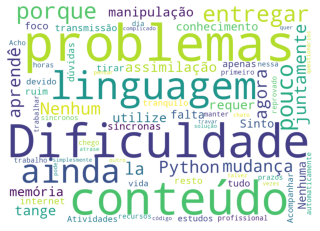

In [83]:
#wordcloud = WordCloud().generate(list(apc)

wordcloud = WordCloud(background_color = 'white',
                    width = 1024,
                    height = 728).generate(tokens_ed)
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('apc.png')
plt.show()

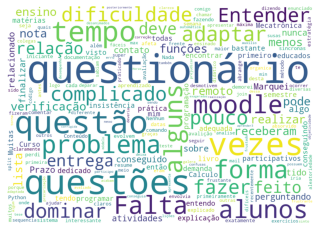

In [84]:
#wordcloud = WordCloud().generate(list(apc)

wordcloud = WordCloud(background_color = 'white',
                    width = 1024,
                    height = 728).generate(tokens_apc)
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('ed.png')
plt.show()

In [85]:
print(comments_ed_tokens)

[' problemas agora', ' Nenhum', ' Dificuldade mudança linguagem Python aprendê-la juntamente', ' problemas.', ' ainda.', ' Dificuldade assimilação conteúdo tange manipulação memória, ainda utilize linguagem requer conhecimento', ' Nenhuma', ' Sinto falta síncronas, foco transmissão conteúdo, apenas tirar dúvidas', ' internet ruim. resto tudo tranquilo', ' Acompanhar Atividades', ' problemas estudos devido vida profissional chego trabalhar horas dia;;;', ' poucos recursos sincronos', ' Dificuldade manter entregar prazos, nessa entregar primeiro trabalho, reprovado automaticamente', ' Acho complicado conteúdo travar outro, porque vezes quer pensar pouco solução, simplesmente pode, porque talvez atrase... questionários código chato']


In [86]:
print(comments_apc_tokens)

[' Marquei finalizar perguntando sobre', ' Prazo entregas atividades', ' conseguido adaptar nunca tido contato algo relacionado.', ' alunos participativos educados.', ' Muitas vezes entendo explicação livro', ' Falta tempo prática forma adequada, visto programar demanda tempo insistência. tendo bastante dificuldade dominar todas matérias primeiro semestre (Curso: Mecatrônica), então, Calculo complicado mim, dedicado conseguindo encontrar tempo dominar programação.', ' Moodle pouco complicado vezes. tempo fazer listas', ' Entender documentação Python', ' falta sincronas afeta aprendizado', ' vezes questionários claros relação comando cada questão, seja, deve feito.', ' iniciante, vezes exatamente fazendo.', ' Conteúdo abrange além explicado semana questão.', ' Nada comentar.', ' Nenhum', ' demorei pouco adaptar moodle perdi datas entrega questionários', ' maior problema desta resume método avaliação verificação questionários, muitos problemas evolvem sistema avalição questionário, prime

### Get all categories from data frame

In [87]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

### Extração de tópicos - ED


In [88]:
tf_vectorizer = CountVectorizer(ngram_range=(1,1),max_df=0.95,min_df=1)

tf = tf_vectorizer.fit_transform(comments_ed_tokens)

lda = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method='online',
                                learning_offset=10.,
                                random_state=0)
lda.fit(tf)

print("\nTopicos extraidos do modelo LDA")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 5)


Topicos extraidos do modelo LDA
Topic #0: conteúdo tange requer assimilação conhecimento
Topic #1: porque problemas acho complicado pouco
Topic #2: horas dia estudos nenhuma ainda
Topic #3: entregar tudo reprovado foco automaticamente
Topic #4: aprendê juntamente mudança python dificuldade



### Extração de tópicos - APC

In [89]:
tf_vectorizer = CountVectorizer(ngram_range=(1,1),max_df=0.95,min_df=1)

tf = tf_vectorizer.fit_transform(comments_apc_tokens)

lda = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method='online',
                                learning_offset=100.,
                                random_state=0)
lda.fit(tf)

print("\nTopicos extraidos do modelo LDA")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 10)


Topicos extraidos do modelo LDA
Topic #0: vezes questões python realizar prazo explicação aprender3 levando atividades livro
Topic #1: tempo dominar complicado encontrar além semestre pouco questão conteúdo falta
Topic #2: funções código estratégia educados adaptada desempenho conseguia iria graças comentar
Topic #3: falta objetividade exatamente fazendo aprendizado contato conseguido quais questões perguntando
Topic #4: questionários questões moodle questão feito alguns adaptar problemas forma lições

